In [1]:
# -*- coding: utf-8 -*-
"""
Archivo principal
"""

import read_data as rd
import prep as pp
import random
import cluster
import pandas as pd

# Set a seed
random.seed(10000)

# Specify filename
fname = 'CompletoAllInputsOutput_28_weeks_RawData.csv'

# Read data and create dummy variables
n, data, labels, clabels, qlabels = rd.rdata(fname)



In [2]:
data.head()

,Luz (lux),Direccion,PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,...,Velocidad del viento (Km/h),peso,O,S,E,NE,N,SE,SO,NO
0,1,NO,0.65,0.71,0.96,0.62,0.90,1.16,1.19,1.16,...,0.0,23.09,0,0,0,0,0,0,0,1
1,1,E,0.65,0.71,0.96,0.63,0.89,1.16,1.19,1.16,...,0.0,30.50,0,0,1,0,0,0,0,0
2,1,SO,0.64,0.71,0.96,0.62,0.89,1.16,1.18,1.16,...,0.0,19.50,0,0,0,0,0,0,1,0
3,1,O,0.63,0.71,0.95,0.61,0.89,1.16,1.17,1.15,...,0.0,25.50,1,0,0,0,0,0,0,0
4,1,O,0.61,0.71,0.94,0.60,0.89,1.16,1.17,1.16,...,0.0,26.50,1,0,0,0,0,0,0,0


In [3]:
labels

['Luz (lux)',
 'Direccion',
 'PORVL2N1',
 'PORVL2N2',
 'PORVL4N1',
 'PORVL5N1',
 'PORVL6N1',
 'PORVL7N1',
 'PORVL8N1',
 'PORVL9N1',
 'PORVL10N1',
 'PORVL13N1',
 'PORVL14N1',
 'PORVL15N1',
 'PORVL16N1',
 'PORVL16N2',
 'PORVL18N1',
 'PORVL18N2',
 'PORVL18N3',
 'PORVL18N4',
 'PORVL21N1',
 'PORVL21N2',
 'PORVL21N3',
 'PORVL21N4',
 'PORVL21N5',
 'PORVL24N1',
 'PORVL24N2',
 'Precipitacion (ml)',
 'Temperatura (C)',
 'Velocidad del viento (Km/h)',
 'peso',
 'O',
 'S',
 'E',
 'NE',
 'N',
 'SE',
 'SO',
 'NO']

In [4]:
clabels

['O', 'S', 'E', 'NE', 'N', 'SE', 'SO', 'NO', 'Direccion']

In [5]:
qlabels

['Luz (lux)',
 'PORVL2N1',
 'PORVL2N2',
 'PORVL4N1',
 'PORVL5N1',
 'PORVL6N1',
 'PORVL7N1',
 'PORVL8N1',
 'PORVL9N1',
 'PORVL10N1',
 'PORVL13N1',
 'PORVL14N1',
 'PORVL15N1',
 'PORVL16N1',
 'PORVL16N2',
 'PORVL18N1',
 'PORVL18N2',
 'PORVL18N3',
 'PORVL18N4',
 'PORVL21N1',
 'PORVL21N2',
 'PORVL21N3',
 'PORVL21N4',
 'PORVL21N5',
 'PORVL24N1',
 'PORVL24N2',
 'Precipitacion (ml)',
 'Temperatura (C)',
 'Velocidad del viento (Km/h)',
 'peso']

In [6]:
# Scale data to 0-1
datan = rd.sdata(data, qlabels, n)

datan.head()

,Luz (lux),Direccion,PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,...,Velocidad del viento (Km/h),peso,O,S,E,NE,N,SE,SO,NO
0,0.0,NO,0.359756,0.396341,0.540373,0.341463,0.476510,0.658228,0.677215,0.670732,...,0.0,0.469424,0,0,0,0,0,0,0,1
1,0.0,E,0.359756,0.396341,0.540373,0.347561,0.469799,0.658228,0.677215,0.670732,...,0.0,0.657447,0,0,1,0,0,0,0,0
2,0.0,SO,0.353659,0.396341,0.540373,0.341463,0.469799,0.658228,0.670886,0.670732,...,0.0,0.378330,0,0,0,0,0,0,1,0
3,0.0,O,0.347561,0.396341,0.534161,0.335366,0.469799,0.658228,0.664557,0.664634,...,0.0,0.530576,1,0,0,0,0,0,0,0
4,0.0,O,0.335366,0.396341,0.527950,0.329268,0.469799,0.658228,0.664557,0.670732,...,0.0,0.555950,1,0,0,0,0,0,0,0


In [7]:
# Split percentages
pe = 0.7 # Training
pv = 0.2 # Validation
pt = 0.1 # Test

# Samples of validation, test and training
ne, nv, ind_e, ind_v, ind_t = rd.slists(n, pe, pv)

In [8]:
ne

3187

In [9]:
# Split data and scaled data
data_e, data_v, data_t, datan_e, datan_v, datan_t = rd.datasplit(data, datan, ind_e, ind_v, ind_t)

data_e.head()


,Luz (lux),Direccion,PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,...,Velocidad del viento (Km/h),peso,O,S,E,NE,N,SE,SO,NO
2577,1,E,0.66,0.65,0.84,0.49,1.57,1.34,1.11,0.96,...,1.415929,30.0,0,0,1,0,0,0,0,0
298,1,S,0.24,0.81,0.91,0.47,0.87,1.08,1.10,1.10,...,1.500000,26.0,0,1,0,0,0,0,0,0
979,38456,O,0.85,1.39,1.37,1.32,1.30,1.70,1.60,1.70,...,4.285714,21.5,1,0,0,0,0,0,0,0
206,8335,S,0.34,0.51,0.80,0.46,0.70,0.86,0.97,0.91,...,2.142857,25.0,0,1,0,0,0,0,0,0
22,25946,NO,0.09,0.72,0.35,0.21,0.55,0.54,0.46,0.42,...,3.799472,27.5,0,0,0,0,0,0,0,1


In [10]:
datan_e.head()

,Luz (lux),Direccion,PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,...,Velocidad del viento (Km/h),peso,O,S,E,NE,N,SE,SO,NO
2577,0.000000,E,0.365854,0.359756,0.465839,0.262195,0.926174,0.772152,0.626582,0.548780,...,0.023599,0.644760,0,0,1,0,0,0,0,0
298,0.000000,S,0.109756,0.457317,0.509317,0.250000,0.456376,0.607595,0.620253,0.634146,...,0.025000,0.543263,0,1,0,0,0,0,0,0
979,0.690023,O,0.481707,0.810976,0.795031,0.768293,0.744966,1.000000,0.936709,1.000000,...,0.071429,0.429079,1,0,0,0,0,0,0,0
206,0.149542,S,0.170732,0.274390,0.440994,0.243902,0.342282,0.468354,0.537975,0.518293,...,0.035714,0.517889,0,1,0,0,0,0,0,0
22,0.465548,NO,0.018293,0.402439,0.161491,0.091463,0.241611,0.265823,0.215190,0.219512,...,0.063325,0.581325,0,0,0,0,0,0,0,1


In [11]:
# Descriptive statistics
des = data[qlabels].describe()

des

,Luz (lux),PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,PORVL10N1,...,PORVL21N2,PORVL21N3,PORVL21N4,PORVL21N5,PORVL24N1,PORVL24N2,Precipitacion (ml),Temperatura (C),Velocidad del viento (Km/h),peso
count,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,...,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000,4553.000000
mean,11796.466506,0.886923,0.993119,1.109523,0.940301,1.337832,1.297819,1.297173,1.242021,1.208155,...,1.245781,1.209840,1.262352,1.272051,1.101856,1.408309,0.060604,27.597512,3.225455,23.747722
std,15813.797565,0.336698,0.365422,0.315910,0.427886,0.299226,0.354107,0.314042,0.364676,0.341793,...,0.362369,0.411631,0.383824,0.276129,0.455770,0.292018,0.730205,3.211945,3.071391,5.247099
min,1.000000,0.060000,0.060000,0.090000,0.060000,0.190000,0.120000,0.120000,0.060000,0.100000,...,0.090000,0.060000,0.220000,0.150000,0.140000,0.370000,0.000000,21.620000,0.000000,4.590000
25%,1.000000,0.710000,0.750000,0.920000,0.600000,1.190000,1.100000,1.100000,0.940000,0.930000,...,0.950000,0.870000,0.950000,1.100000,0.760000,1.210000,0.000000,25.060000,1.264267,20.000000
50%,267.000000,0.840000,0.920000,1.020000,0.790000,1.370000,1.270000,1.220000,1.140000,1.110000,...,1.150000,1.060000,1.220000,1.300000,1.050000,1.380000,0.000000,26.620000,2.642202,23.500000
75%,22927.000000,1.110000,1.390000,1.380000,1.330000,1.650000,1.700000,1.670000,1.700000,1.540000,...,1.700000,1.680000,1.700000,1.460000,1.670000,1.700000,0.000000,30.560000,4.660194,27.000000
max,55731.000000,1.700000,1.700000,1.700000,1.700000,1.680000,1.700000,1.700000,1.700000,1.700000,...,1.700000,1.700000,1.700000,1.700000,1.700000,1.700000,31.360000,39.930000,60.000000,44.000000


In [12]:
# Correlation matrix
corr = data[qlabels].corr()

corr.head()

,Luz (lux),PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,PORVL10N1,...,PORVL21N2,PORVL21N3,PORVL21N4,PORVL21N5,PORVL24N1,PORVL24N2,Precipitacion (ml),Temperatura (C),Velocidad del viento (Km/h),peso
Luz (lux),1.000000,0.029647,0.036583,0.028007,0.015039,0.020942,0.000128,0.007008,0.005685,0.023342,...,0.009224,0.016958,0.007072,-0.002993,0.006604,0.005656,-0.048974,0.879957,0.374584,-0.010703
PORVL2N1,0.029647,1.000000,0.768634,0.865285,0.854407,0.469471,0.781679,0.802660,0.701264,0.611801,...,0.604194,0.654784,0.659784,0.754360,0.826668,0.669886,-0.108791,0.057875,0.191921,-0.064825
PORVL2N2,0.036583,0.768634,1.000000,0.928943,0.912805,0.207890,0.845891,0.887077,0.834475,0.842515,...,0.834121,0.862918,0.803873,0.735568,0.856051,0.812767,-0.100915,0.070705,0.129638,-0.107519
PORVL4N1,0.028007,0.865285,0.928943,1.000000,0.954367,0.262389,0.870236,0.922521,0.874494,0.808101,...,0.837227,0.861009,0.815701,0.783620,0.913584,0.814306,-0.102741,0.043126,0.171098,-0.076321
PORVL5N1,0.015039,0.854407,0.912805,0.954367,1.000000,0.271875,0.871944,0.914773,0.902349,0.824744,...,0.848537,0.890125,0.845686,0.797113,0.908719,0.819325,-0.075167,0.024632,0.168620,-0.085709


In [13]:
# Initial plots
nq = len(qlabels)
npl = 6

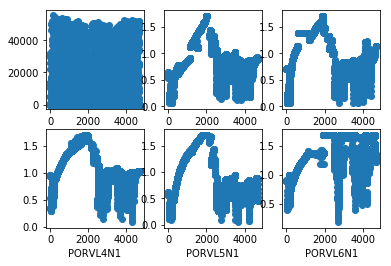

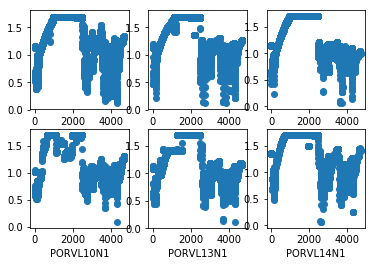

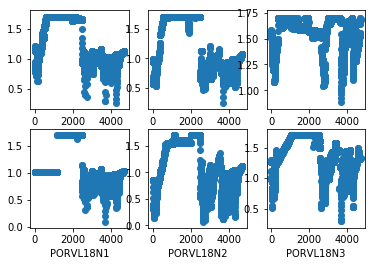

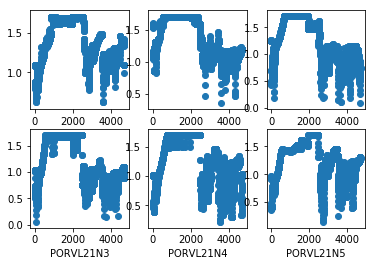

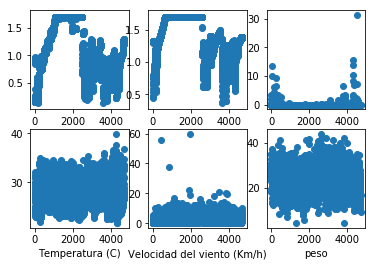

In [14]:
# Scatter plots
pp.plots(data, qlabels, npl, nq)

In [15]:
# Variable of interest
ylabel = 'peso'

In [16]:
# Correlation percentage
cp = 0.9;

# Drop variables with high correlation
cc = 4

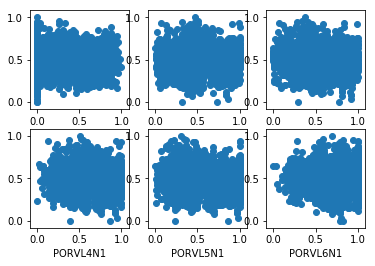

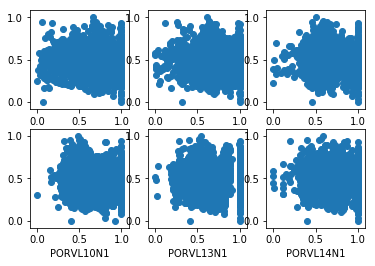

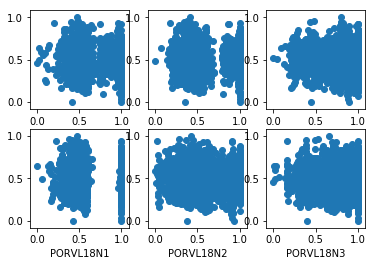

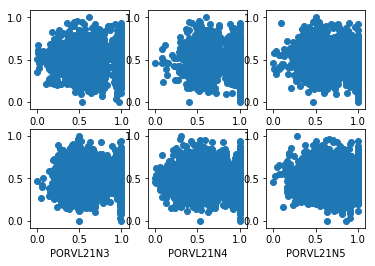

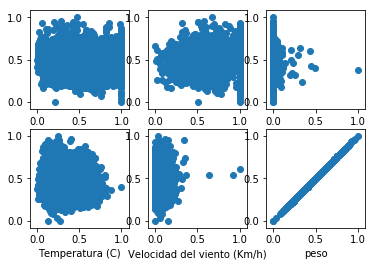

In [17]:
# Plot variables vs peso
z, c, lv = pp.plotsc(datan, qlabels, ylabel, nq, npl, cp, cc)


In [18]:
z.head()

,Luz (lux),PORVL2N1,PORVL2N2,PORVL4N1,PORVL5N1,PORVL6N1,PORVL7N1,PORVL8N1,PORVL9N1,PORVL10N1,...,Velocidad del viento (Km/h),peso,O,S,E,NE,N,SE,SO,NO
Luz (lux),False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PORVL2N1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PORVL2N2,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PORVL4N1,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
PORVL5N1,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
c.head()

Luz (lux)    0
PORVL2N1     0
PORVL2N2     0
PORVL4N1     1
PORVL5N1     2
dtype: int64

In [20]:
lv

['PORVL13N1', 'PORVL15N1', 'PORVL16N1', 'PORVL18N2', 'PORVL21N3', 'PORVL24N1']

In [21]:
# ylabels for classification
ylabels = []
"""
0: Pequeño (0-15)
1: Mediano (15-23)
2: Grande (23-)
"""

for i in range(n):
    if data[ylabel].iloc[i] < 15:
        ylabels.append(0)
    elif data[ylabel].iloc[i]>=15 and data[ylabel].iloc[i]<23:
        ylabels.append(1)
    elif data[ylabel].iloc[i]>=23: 
        ylabels.append(2)

In [22]:
ylabels


# Convert to pandas
ylabels = pd.DataFrame(ylabels)

# Split y
y_e = ylabels.iloc[ind_e]
y_v = ylabels.iloc[ind_v]
y_t = ylabels.iloc[ind_t]

y_e.head()


,0
2443,2
298,2
979,1
206,2
22,2


In [23]:
# Principal components
from sklearn.decomposition import PCA
# Number of components
pca2 = PCA(n_components = 2)
pca2.fit(datan[qlabels])
datapca2 = pca2.transform(datan[qlabels])
datapca2_e = datapca2[ind_e]
datapca2_v = datapca2[ind_v]
datapca2_t = datapca2[ind_t]

datapca2_t

array([[-0.88567346,  0.58121579],
       [-1.15238917, -0.27338508],
       [ 1.79643293, -0.33353536],
       [-1.14291016,  0.27625278],
       [-0.73942078, -0.25776895],
       [ 0.74346269,  0.26415369],
       [-0.48559291, -0.3017441 ],
       [-1.304803  , -0.22751668],
       [-1.30247007, -0.24223892],
       [ 0.54399575, -0.21573917],
       [-0.84914229, -0.25930122],
       [ 0.37601499, -0.22085498],
       [ 0.72494475,  0.42685285],
       [-1.03784634,  0.72903976],
       [ 0.31281914,  0.27281035],
       [ 0.74234604, -0.18083458],
       [ 0.06388862, -0.24125645],
       [ 0.84332459, -0.24908887],
       [-1.34926918, -0.26786563],
       [ 1.33507416, -0.27886921],
       [ 0.70192445, -0.2249824 ],
       [-1.18597049, -0.26572996],
       [-1.04115283, -0.24666987],
       [-1.34746454, -0.27260749],
       [ 0.88660177, -0.23873904],
       [ 0.89765874, -0.2040327 ],
       [ 0.43845362,  0.43992673],
       [-1.36678561, -0.22234219],
       [ 0.83132134,

In [24]:
# Principal components
from sklearn.decomposition import PCA
# Number of components
ncomp = 3
pca3 = PCA(n_components = ncomp)
pca3.fit(datan[qlabels])
datapca3 = pca3.transform(datan[qlabels])
datapca3_e = datapca3[ind_e]
datapca3_v = datapca3[ind_v]
datapca3_t = datapca3[ind_t]

datapca3_t

array([[-0.88567346,  0.58121576,  0.42047369],
       [-1.15238917, -0.2733851 ,  0.12027029],
       [ 1.79643293, -0.33353532,  0.5872974 ],
       ...,
       [-1.09025142, -0.27113566,  0.17258068],
       [ 0.89564399, -0.19280971, -0.21413132],
       [ 0.26268541, -0.26530158,  0.35105619]])